In [8]:
#爬虫程序，运用request(urllib)爬取网站pdf
#爬取IJCAI（国际人工智能联合会议）最新2020年的pdf论文文件。
#pdf文件所在网页url='http://www.ijcai.org/proceedings/year/'。将year用年份来代替就可以找到响应年份的pdf文件了，由于一年的文件都将近780份，所以这里只选择统计2020年的，
#编码用到了正则表达式从html里面提取信息
import urllib.request
import re
import os

url = 'http://www.ijcai.org/proceedings/2020/'

def getHtml(url):
    request = urllib.request.Request(url)
    request.add_header('User-Agent','Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36')
    response = urllib.request.urlopen(request)
    html = response.read()

    return html

html = getHtml(url)

def getPaper(html):
    if not os.path.exists('IJCAI_2020') : #文件夹不存在时，再进行创建
        os.mkdir('IJCAI_2020')
    os.chdir(os.path.join(os.getcwd(), 'IJCAI_2020'))

    reg = 'href="(\d{4}\.pdf)"'        #正则表达式
    papre = re.compile(reg)
    addr_list = re.findall(papre, html.decode('utf-8'))

    num = len(addr_list)
    print('论文总数：', num)

    m =1
    for paperurl in addr_list:
        fname = '%s.pdf' %m#论文下载名
        paper_url = url + paperurl#论文下载地址
        print(paper_url)
        paper = getHtml(paper_url)

        with open(fname, 'wb') as f:
            f.write(paper)

        m += 1

        print('已下载')
        f.close()

getPaper(html)

论文总数： 778
http://www.ijcai.org/proceedings/2020/0001.pdf
已下载
http://www.ijcai.org/proceedings/2020/0002.pdf
已下载
http://www.ijcai.org/proceedings/2020/0003.pdf
已下载
http://www.ijcai.org/proceedings/2020/0004.pdf
已下载
http://www.ijcai.org/proceedings/2020/0005.pdf
已下载
http://www.ijcai.org/proceedings/2020/0006.pdf
已下载
http://www.ijcai.org/proceedings/2020/0007.pdf
已下载
http://www.ijcai.org/proceedings/2020/0008.pdf
已下载
http://www.ijcai.org/proceedings/2020/0009.pdf
已下载
http://www.ijcai.org/proceedings/2020/0010.pdf
已下载
http://www.ijcai.org/proceedings/2020/0011.pdf
已下载
http://www.ijcai.org/proceedings/2020/0012.pdf
已下载
http://www.ijcai.org/proceedings/2020/0013.pdf
已下载
http://www.ijcai.org/proceedings/2020/0014.pdf
已下载
http://www.ijcai.org/proceedings/2020/0015.pdf
已下载
http://www.ijcai.org/proceedings/2020/0016.pdf
已下载
http://www.ijcai.org/proceedings/2020/0017.pdf
已下载
http://www.ijcai.org/proceedings/2020/0018.pdf
已下载
http://www.ijcai.org/proceedings/2020/0019.pdf
已下载
http://www.ijcai.org/

### 这是爬取后的pdf文献截图 
![pdf文件夹.png](https://s3.ax1x.com/2021/01/24/sbaHmD.png)
![1.png](https://s3.ax1x.com/2021/01/24/sbaxpt.png)
### 将pdf转化为txt，由于程序在运行过程中会不断生成警告，所以将交互式界面里的输出给删去了

In [ ]:
# -*- coding:utf-8 -*-
import sys
from pdfminer.pdfinterp import PDFResourceManager, process_pdf
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from io import StringIO
from io import open
import io
 
def readPDF(pdfFile):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, laparams=laparams)
 
    process_pdf(rsrcmgr, device, pdfFile)
    device.close()
 
    content = retstr.getvalue()
    retstr.close()
    return content

 
for i in range(1,779): 
    txt = readPDF(open(f'IJCAI_2020/{i}.pdf', 'rb'))
    with open(f"pdf_txt/{i}.txt", "w",encoding='utf-8') as f:
    # with open("istxt.txt", "wb") as f:
        f.write(txt)


### 这是pdf文献转换成txt后的截图
![pdf转txt](https://s3.ax1x.com/2021/01/24/sb0EQ0.png)
### 对pdf_txt中所有的txt文件进行整合，最终合并成一个txt文件，命名为result.txt。
### 由于pdf_txt里面的.ipynb_checkpoints文件夹访问权限的限制，导致对pdf_txt文件夹进行访问时受限，产生permission denied错误，使得程序中断。所以在进行整合程序之前，先要将这个文件夹删掉。
![删除.ipynb_checkpoints文件夹](https://s3.ax1x.com/2021/01/24/sbaOkd.png)

In [25]:
# -*- coding:utf-8 -*-
import os
 
"""
合并多个txt
"""
 
# 获取目标文件夹的路径
path = "pdf_txt"
# 获取当前文件夹中的文件名称列表
filenames = os.listdir(path)
result = "result.txt"
# 打开当前目录下的result.txt文件，如果没有则创建
file = open(result, 'w+', encoding="utf-8")
# 向文件中写入字符
 
# 先遍历文件名
for filename in filenames:
    filepath = path + '/'
    filepath = filepath + filename
    # 遍历单个文件，读取行数
    for line in open(filepath, encoding="utf-8"):
        file.writelines(line)
    file.write('\n')
# 关闭文件
file.close()

### 合并后的result.txt
![合并后的txt](https://s3.ax1x.com/2021/01/24/sbab0e.png)
### 统计合并后的result.txt里的词频，并将高频词用词云表示出来。图片命名为"wordcloud.jpg"

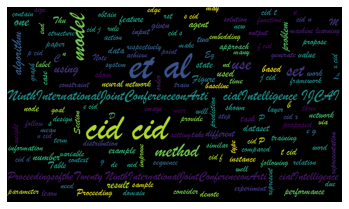

In [3]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

txt = open("result.txt", encoding='utf-8').read()# 加载txt文本
wordslist = jieba.cut(txt)# 返回可迭代的数据
wl = " ".join(wordslist)# 将序列中的元素以空格连接生成一个新的字符串

wc = WordCloud(font_path='C:/Users/Windows/fonts/STXINGKA.TTF',  # 设置字体
               #background_color="white",  # 可以设置背景颜色为白色
               max_words=150,  # 词云显示的最大词数
               max_font_size=150,  # 字体最大值
               random_state=60,# 设置有多少种配色方案
               width=1200, height=700,# 设置图片的大小
               ).generate(txt)# 生成词云

plt.imshow(wc)# 对图像进行处理并显示格式
plt.axis("off")# 关闭坐标轴线和标签
plt.show()# 显示图像
wc.to_file('wordcloud.jpg')# 将词云输出为图片，保存为wordcloud.jpg/.png


### 最后整个流程下来所产生的所有的文件
![ipynb文件所在文件夹](https://s3.ax1x.com/2021/01/24/sb03S1.png)